In [10]:
import sys, os
import time
sys.path.append('../')
sys.path.append('/home/alberto/phD/projects/performance_prediction/ret-mr-retrieval_lite/')

In [11]:
import numpy as np
np.set_printoptions(precision=3, linewidth=300, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import cv2
import cv2.flann

from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors

In [12]:
from libretrieval.features.io import load_features

In [ ]:
features = load_features("/home/alberto/phD/datasets/places365/e001-vgg16-DEEPFV/features/collection/")
features_l2 = normalize(features, 'l2', axis=1)

q_features = load_features("/home/alberto/phD/datasets/places365/e001-vgg16-DEEPFV/features/query")
q_features_l2 = normalize(q_features, 'l2', axis=1)

### Flann Index

In [ ]:
linear_flann = cv2.flann_Index(features, dict(algorithm=0), distType=1)
kdfor_flann = cv2.flann_Index(features, dict(algorithm=1, trees=10), distType=1)

In [ ]:
ts = time.perf_counter()
indices_cv, dists_cv = linear_flann.knnSearch(q_features, knn=5, params=dict(checks=32))
print("Linear Query -- Elapsed {0:0.8f}s".format(time.perf_counter() - ts))

#for i in range(5):
    #print("[{0:06d} : {1:0.30f}]".format(indices[0, i], dists[0, i]))


#ts = time.perf_counter()
#indices, dists = kdfor_flann.knnSearch(q_features, knn=5, params=dict(checks=32))
#print("\nKDForest Query -- Elapsed {0:0.8f}s".format(time.perf_counter() - ts))

#for i in range(5):
#    print("[{0:06d} : {1:0.4f}]".format(indices[0, i], dists[0, i]))
    
#print(dists)
#print(indices)

### SKlearn NNeighbors

In [ ]:
brute_ngbrs = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='sqeuclidean', n_jobs=4)
_ = brute_ngbrs.fit(features)

kdtree_ngbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
_ = kdtree_ngbrs.fit(features)

In [ ]:
ts = time.perf_counter()
dists_sk, indices_sk = brute_ngbrs.kneighbors(q_features, n_neighbors=5)
print("Brute Query -- Elapsed {0:0.8f}s".format(time.perf_counter() - ts))

#for i in range(5):
    #print("[{0:06d} : {1:0.30f}]".format(indices[0, i], dists[0, i]))


#ts = time.perf_counter()
#dists, indices = kdtree_ngbrs.kneighbors(q_features, n_neighbors=5)
#print("\nKDTree Query -- Elapsed {0:0.8f}s".format(time.perf_counter() - ts))

#for i in range(5):
#    print("[{0:06d} : {1:0.4f}]".format(indices[0, i], dists[0, i]))
    
    
#print(dists)
#print(indices)

### Diffs Plot

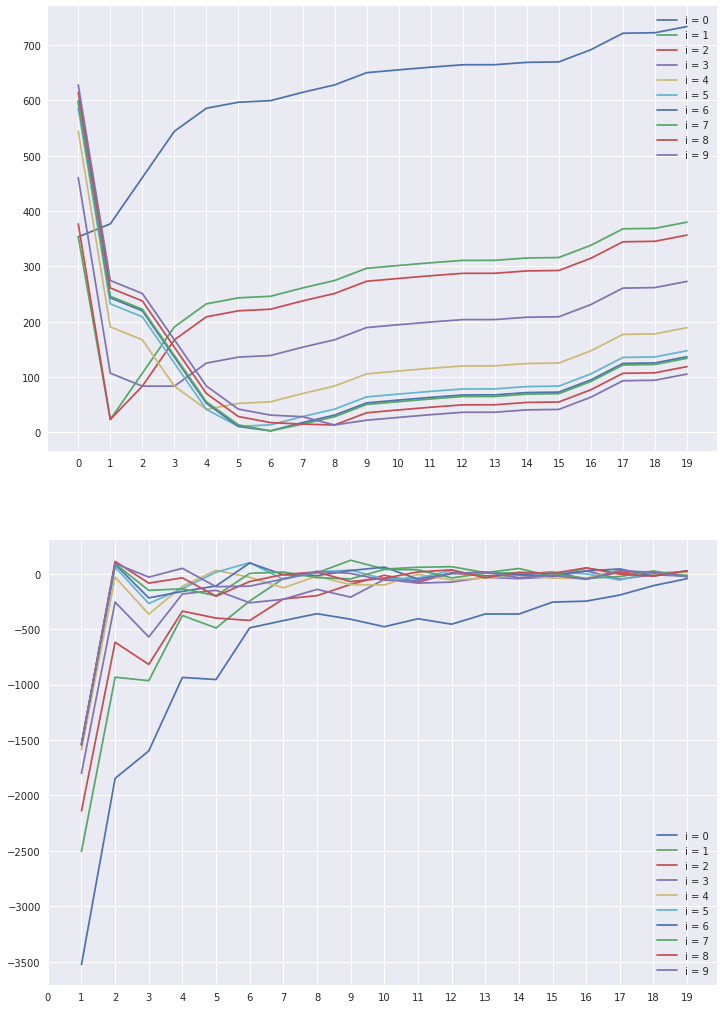

In [47]:
from rankutils.rIO import read_rank
from rankutils.features import rank_features_circ_deltaik, rank_features_shiftDCT

arr = read_rank('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-ranks/2x5-fold/places365/001.vgg16-L2sq/00053_amphitheater_00004911.jpg.rk')

fig, ax = plt.subplots(2, 1)
ax1, ax2 = ax
fig.set_size_inches((12, 18))

k = 20
x = np.arange(k)

for i in range(10):
    ax1.plot(x, np.abs(rank_features_circ_deltaik(arr['score'], i, k)), label='i = {0:d}'.format(i))
_ = ax1.set_xticks(x)
_ = ax1.legend()

for i in range(10):
    ax2.plot(x[1:], rank_features_shiftDCT(arr['score'], i, k, 2)[1:], label='i = {0:d}'.format(i))
_ = ax2.set_xticks(x)
_ = ax2.legend()